In [2]:
# CSV파일을 이용한 Kaggle의 Cat & Dog 전체 이미지 학습과 평가
# CNN으로 구현할꺼예요!

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/[빅데이터 과정 공유폴더]/data/개와고양이 전체 데이터파일/train.csv')
display(df.head(), df.shape)  # (25000, 6401)

In [4]:
# label(target) data와 pixel data를 분리해보아요!
# 데이터 확인하기 위해서
label_data = df['label'].values  # 1차원 ndarray
pixel_data = df.drop('label', axis=1, inplace=False).values # 2차원 ndarray


In [ ]:
# 샘플 이미지 확인
plt.imshow(pixel_data[153].reshape(80,80), cmap='gray')
print(label_data[153]) # => 1
plt.show()


In [11]:
# 데이터 전처리
# 1. 결측치 - 없어요!
# 2. 이상치 - 없어요!
# 3. 정규화처리
scaler = MinMaxScaler()
scaler.fit(pixel_data)
x_data_norm = scaler.transform(pixel_data)
# 4. train, test 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 label_data.reshape(-1,1),
                 test_size=0.3)

In [ ]:
# Model 구현
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 padding='same',
                 input_shape=(80,80,1)))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 padding='same',
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

# FC Layer(Classifier - 분류기)
model.add(Flatten())

model.add(Dense(units=256,
                activation='relu'))

model.add(Dropout(rate=0.4))

model.add(Dense(units=1,
                activation='sigmoid'))

model.summary()

In [16]:
# 학습 설정하고 학습 진행!
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 일반적으로 callback을 설정해요!
# 우리는 callback을 설정하지 않고 학습을 진행

history = model.fit(x_data_train_norm.reshape(-1,80,80,1),
                    t_data_train,
                    epochs=100,
                    verbose=1,
                    batch_size=100,
                    validation_split=0.3)


Epoch 1/100
123/123 [==============================] - 20s 49ms/step - loss: 0.6741 - accuracy: 0.5681 - val_loss: 0.6311 - val_accuracy: 0.6415
Epoch 2/100
123/123 [==============================] - 5s 38ms/step - loss: 0.6181 - accuracy: 0.6589 - val_loss: 0.5961 - val_accuracy: 0.6811
Epoch 3/100
123/123 [==============================] - 5s 39ms/step - loss: 0.5806 - accuracy: 0.6936 - val_loss: 0.5636 - val_accuracy: 0.7090
Epoch 4/100
123/123 [==============================] - 5s 40ms/step - loss: 0.5489 - accuracy: 0.7159 - val_loss: 0.5360 - val_accuracy: 0.7307
Epoch 5/100
123/123 [==============================] - 5s 39ms/step - loss: 0.5141 - accuracy: 0.7418 - val_loss: 0.5274 - val_accuracy: 0.7385
Epoch 6/100
123/123 [==============================] - 5s 40ms/step - loss: 0.4880 - accuracy: 0.7663 - val_loss: 0.4877 - val_accuracy: 0.7608
Epoch 7/100
123/123 [==============================] - 5s 39ms/step - loss: 0.4590 - accuracy: 0.7833 - val_loss: 0.4792 - val_accuracy

In [18]:
# 학습이 잘 됬으면 이제 모델 평가를 진행해야 해요!
print(model.evaluate(x_data_test_norm.reshape(-1,80,80,1,),
                     t_data_test))
# [0.8023147583007812, 0.8352000117301941]

235/235 [==============================] - 2s 8ms/step - loss: 0.8023 - accuracy: 0.8352
[0.8023147583007812, 0.8352000117301941]


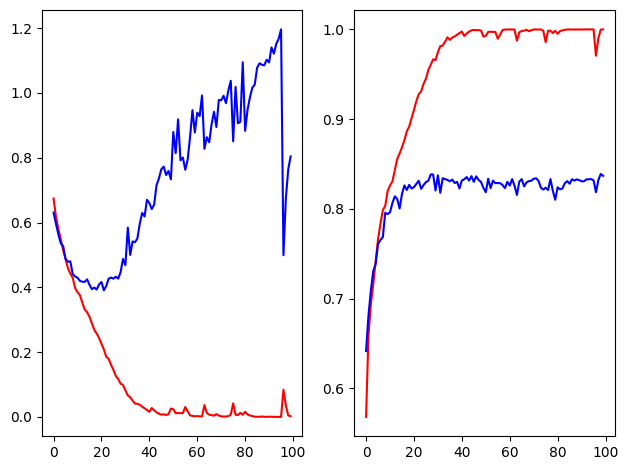

In [19]:
# 마지막으로 그래프 그려보아요!
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], color='r')
ax1.plot(history.history['val_loss'], color='b')

ax2.plot(history.history['accuracy'], color='r')
ax2.plot(history.history['val_accuracy'], color='b')

plt.tight_layout()
plt.show()

In [21]:
# ImageDataGenerator를 이용하기 위해서
# 우리가 가진 개와 고양이 데이터를 특정 폴더구조로 변경해 보아요!
import os, shutil

original_dataset_dir = './data/cat_dog/train'

base_dir = 'data/cat_dog_full'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir,'train').replace('\\','/')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation').replace('\\','/')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test').replace('\\','/')
os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir,'cats').replace('\\','/')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs').replace('\\','/')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats').replace('\\','/')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs').replace('\\','/')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats').replace('\\','/')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs').replace('\\','/')
os.mkdir(test_dogs_dir)

## file 복사 ##
## 고양이와 멍멍이가 각각 12,500개
## train : 7,000
## validation : 3,000
## test : 2,500

fnames = ['cat.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_cats_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(train_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(7000,10000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(validation_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(10000,12500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir,fname).replace('\\','/')
    dst = os.path.join(test_dogs_dir, fname).replace('\\','/')
    shutil.copyfile(src,dst)

FileNotFoundError: ignored